In [1]:
import torch
import cv2
import numpy as np
from PIL import Image

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

im = cv2.imread("test.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

Using cache found in /home/hpled/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-8-11 Python-3.8.10 torch-1.12.1+cu116 CUDA:0 (NVIDIA RTX A4000, 16117MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [2]:
det = model([im])

[788.6793212890625, 192.9258270263672, 1303.20361328125, 995.6614379882812, 0.4013688862323761, 73, 'book']


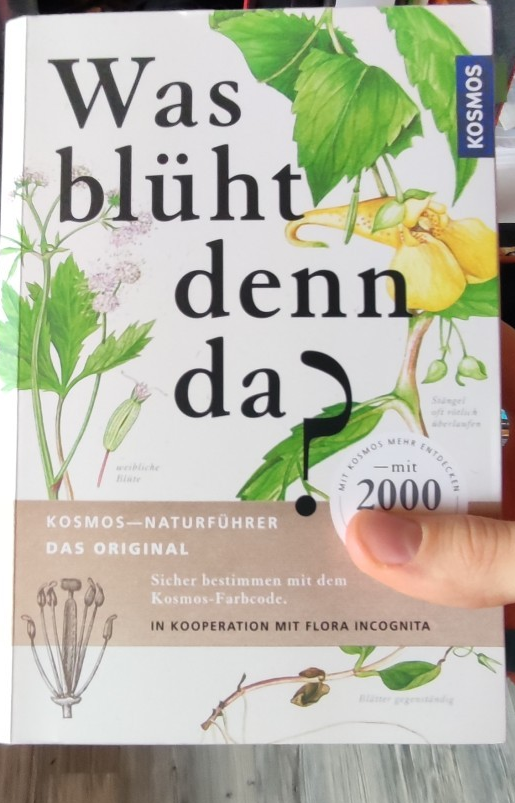

In [3]:
# get the bounding boxes from yolo detections
bboxes = det.pandas().xyxy[0].to_numpy().tolist()
# filter for only book detections
books = list(filter(lambda x: x[6] == "book",bboxes))
# compute the pixel area for each book detection
book_areas = [(b[2] - b[0]) * (b[3] - b[1])  for b in books]
# find the biggest detected book 
book = books[np.argmax(book_areas)]

print(book)

crop = im[int(book[1]):int(book[3]),int(book[0]):int(book[2])]

Image.fromarray(crop)

In [4]:
import rospy
from cv_bridge import CvBridge
from librarian_resources.srv import BookCoverInspect, BookCoverInspectRequest

b = CvBridge()
s = rospy.ServiceProxy("/librarian/book/inspect", BookCoverInspect)

topicmanager initialized


In [6]:
msg = b.cv2_to_imgmsg(cv2.cvtColor(im, cv2.COLOR_RGB2BGR))
s.call(source=msg)

id: 11
confidence: 0.8474013805389404
text: 
  data: "was i bluht denn osmos mit 2000 das original sicher bestimmen dem mit kosmose farbcodes\
  \ in kooperation mit flora incognita"
title: 
  data: "Graphik in Industrie und Technik"

In [ ]:
np.array([[1, 2], [3, 4], [5, 6]]).T

array([[1, 3, 5],
       [2, 4, 6]])